In [1]:
import plotly.graph_objects as go
import numpy as np
import random

# Source of distanceToObstacle function: 
# David Eberly, Geometric Tools, Redmond WA 98052
# Copyright (c) 1998-2020
# Distributed under the Boost Software License, Version 1.0.
# https://www.boost.org/LICENSE_1_0.txt
# https://www.geometrictools.com/License/Boost/LICENSE_1_0.txt
# Version: 4.0.2019.08.13

In [22]:
wingspan = 10

In [35]:
class ObstacleData: 
    def __init__(self, coords, r):
        self.coordinates = coords
        self.radius = r 

In [24]:
all_obstacles = []
for i in range(30):
    x = random.randint(30, 6000)
    y = random.randint(30, 6000)
    z = 0
    r = random.randint(5, 151)
    all_obstacles.append(ObstacleData(np.array([x, y, z]), r, [0, 0, 1]))
all_obstacles.append(ObstacleData(np.array([50, 50, 50]), 5, [0, 0, 1]))

In [25]:
all_obstacles

In [28]:
w_x,w_y,w_z = [100, 154.4], [100, 164.4], [100, 50]


In [29]:
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z,
                                   mode='markers', marker=dict(
        size=7,
        color=z,                  
        opacity=0.8
    ))])

fig.add_trace(
    go.Scatter3d(x=w_x, y=w_y, z=w_z, mode='markers',
        marker=dict(
        size=5)))
fig.show()

ValueError: 
    Invalid value of type 'builtins.int' received for the 'x' property of scatter3d
        Received value: 672

    The 'x' property is an array that may be specified as a tuple,
    list, numpy array, or pandas Series

In [49]:
def pointDistanceToObstacle(point, obstacle):
    return np.sqrt((point[0] - obstacle[0])**2 + (point[1] - obstacle[1])**2)

In [122]:
def distanceToObstacle(curr, goal, obstacle):
    obstacle_dir = np.array([0, 0, 1])
    center = np.array([0.5 * i for i in np.add(curr, goal)])
    path_direction = np.subtract(goal, curr)
    extent = 0.5 * np.linalg.norm(path_direction)
    path_direction = np.true_divide(path_direction, np.linalg.norm(path_direction))
    diff = obstacle.coordinates - center
    a01 = -np.dot(obstacle_dir, path_direction)
    b0 = np.dot(diff, obstacle_dir)
    if abs(a01) < 1:
        # The ray and segment are not parallel.
        det = 1 - a01 * a01
        ext_det = extent * det
        b1 = -np.dot(diff, path_direction)
        s0 = a01 * b1 - b0
        s1 = a01 * b0 - b1

        if s0 >= 0:
            if s1 >= -ext_det:
                if s1 <= ext_det: # region 0
                    # Minimum at interior points of ray and segment.
                    s0 /= det
                    s1 /= det
                else:  # region 1
                    s1 = extent
                    s0 = max(-(a01 * s1 + b0), 0)
            else:  # region 5
                s1 = -extent
                s0 = max(-(a01 * s1 + b0), 0)
        else:
            if s1 <= -ext_det:  # region 4
                s0 = -(-a01 * extent + b0)
                if s0 > 0:
                    s1 = -extent
                else:
                    s0 = 0
                    s1 = -b1
                    if s1 < -extent:
                        s1 = -extent
                    elif s1 > extent:
                        s1 = extent
            elif s1 <= ext_det:  # region 3
                s0 = 0
                s1 = -b1
                if s1 < -extent:
                    s1 = -extent
                elif s1 > extent:
                    s1 = extent
            else:  # region 2
                s0 = -(a01 * extent + b0)
                if s0 > 0:
                    s1 = extent
                else:
                    s0 = 0
                    s1 = -b1
                    if s1 < -extent:
                        s1 = -extent
                    elif s1 > extent:
                        s1 = extent
    else:
        # Ray and segment are parallel.
        if a01 > 0:
            # Opposite direction vectors.
            s1 = -extent
        else:
            # Same direction vectors.
            s1 = extent
        s0 = max(-(a01 * s1 + b0), 0)

    closestp0 = obstacle.coordinates + s0 * obstacle_dir
    closestp1 = center + s1 * path_direction
    diff = closestp0 - closestp1
    sqr_distance = np.dot(diff, diff)
    distance = np.sqrt(sqr_distance)
    return distance

In [123]:
distanceToObstacle(np.array([200.0, 200.0, 200.0]), np.array([300.0, 300.0, 300.0]), ObstacleData([500.0, 500.0, 0], 10.0))

282.842712474619 [500. 500. 300.] [300. 300. 300.]


282.842712474619

In [126]:
def dangerousObstacles(curr, goal):
    inPath = []
    for obstacle in all_obstacles:
        if distanceToObstacle(curr, goal, obstacle) < wingspan + obstacle.radius:
            inPath.append(obstacle)
            print(distanceToObstacle(curr, goal, obstacle))
    return inPath

dangerousObstacles([100, 100, 100], [154.4, 164.4, 50])

3586.542725243908 [ 585. 3725.   50.] [154.4 164.4  50. ]
4934.061604803896 [3901. 3375.   50.] [154.4 164.4  50. ]
4615.142611014312 [ 718. 4745.   50.] [154.4 164.4  50. ]
6032.485451287886 [3647. 5083.   50.] [154.4 164.4  50. ]
5445.795783905232 [2779. 4936.   50.] [154.4 164.4  50. ]
1301.1085734864712 [1450.  284.   50.] [154.4 164.4  50. ]
6244.234566382016 [3287. 5566.   50.] [154.4 164.4  50. ]
4659.429570237113 [1633. 4583.   50.] [154.4 164.4  50. ]
4834.562950257241 [2411. 4440.   50.] [154.4 164.4  50. ]
2820.0321842135063 [2895.  829.   50.] [154.4 164.4  50. ]
1186.6668108614144 [ 993. 1004.   50.] [154.4 164.4  50. ]
5274.335798941892 [4782. 2695.   50.] [154.4 164.4  50. ]
6818.555412988883 [5714. 4112.   50.] [154.4 164.4  50. ]
3278.6010309276726 [3433.  167.   50.] [154.4 164.4  50. ]
1679.9074736425216 [1286. 1406.   50.] [154.4 164.4  50. ]
5441.108464274536 [4053. 3960.   50.] [154.4 164.4  50. ]
5817.311382417139 [1065. 5910.   50.] [154.4 164.4  50. ]
1494.4513

[]

In [127]:
dangerousObstacles(np.array([100, 100, 100]), np.array([4000, 2000, 6000]))

3046.42310424445 [ 585.         3725.         2852.18384697] [1919.24017003  986.29649309 2852.18384697]
1378.559392989653 [3901. 3375. 6000.] [4000. 2000. 6000.]
3905.1428371622656 [ 718.        4745.        3622.3501594] [2428.33315622 1234.31615303 3622.3501594 ]
3103.1432451628784 [3647. 5083. 6000.] [4000. 2000. 6000.]
3179.7699602329726 [2779. 4936. 6000.] [4000. 2000. 6000.]
425.8445855615312 [1450.          284.         1860.15621679] [1263.49309245  666.82996812 1860.15621679]
3636.581499155491 [3287. 5566. 6000.] [4000. 2000. 6000.]
3358.764456109706 [1633.        4583.        4644.5674814] [3104.03613177 1563.50478215 4644.5674814 ]
2889.4686935543737 [2411.         4440.         5510.60095643] [3676.4989373  1842.39691817 5510.60095643]
568.7609236843793 [2895.          829.         3951.48990436] [2645.90010627 1340.31030818 3951.48990436]
421.5801464401236 [ 993.         1004.         1730.27470776] [1177.6392136   625.00371945 1730.27470776]
1046.206958493395 [4782. 2695

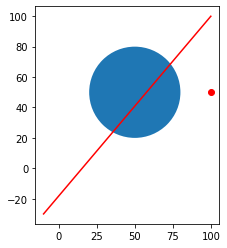

In [41]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines


def create_circle(r):
    circle= plt.Circle((50,50), radius= r)
    return circle

def show_shape(patch, cur_graph):
    ax=cur_graph
    ax.add_patch(patch)
    plt.axis('scaled')
    plt.show()


c = create_circle(30)
graph = plt.gca()
l = mlines.Line2D([-10,100], [-30,100], color="r")
graph.add_line(l)
graph.scatter(100, 50, color="r")
# graph.scatter([200, 500], [100, 100], color="r")

show_shape(c, graph)